--------------------
#### fdist 
- The FreqDist class from the nltk.probability module is a frequency distribution for outcomes of an experiment. It's a type of collection that allows you to count the number of occurrences of each item. It's particularly useful in natural language processing for tasks such as counting the frequency of each word in a text.
---------------

In [1]:
import nltk
from nltk.corpus import brown
from nltk.probability import FreqDist


#### Using FreqDist on Brown corpus:
- We'll count the frequency of each word in the 'news' category of the Brown corpus.

In [2]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\bhupe\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
words = brown.words(categories='news')
fdist = FreqDist(words)

#### Most Common Words:

In [4]:
print(fdist.most_common(10))  # Top 10 most common words


[('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146), ('to', 2116), ('a', 1993), ('in', 1893), ('for', 943), ('The', 806)]


#### Frequency of a Specific Word

In [5]:
print(fdist['the'])  # Frequency of the word 'the'


5580


#### Total Word Count

In [6]:
print(len(fdist))


14394


#### Frequency Distribution Plot:
For visualization, you can plot the frequency distribution of the top n 

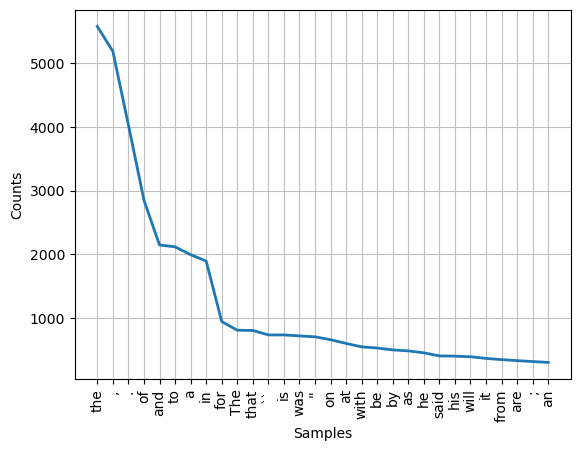

In [7]:
import matplotlib.pyplot as plt
fdist.plot(30, cumulative=False)  # Plot for the top 30 words
plt.show()


#### Words that appear only once

In [9]:
hapaxes = fdist.hapaxes()
print(hapaxes[:10])  # First 10 words that appear only once


['term-end', 'presentments', 'September-October', 'Durwood', 'Pye', 'hard-fought', 'Mayor-nominate', 'handful', 'outmoded', 'ambiguous']


####  frequency distribution of useful words while excluding stopwords

In [10]:
from nltk.corpus import stopwords

In [12]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

In [13]:
# Filter out stopwords and non-alphabetic words from the Brown corpus 'news' category
filtered_words = [word for word in brown.words(categories='news') if word.lower() not in stop_words and word.isalpha()]

In [14]:
fdist = FreqDist(filtered_words)


[('said', 402), ('would', 244), ('one', 184), ('last', 161), ('two', 157), ('new', 148), ('first', 143), ('year', 138), ('home', 127), ('also', 120)]


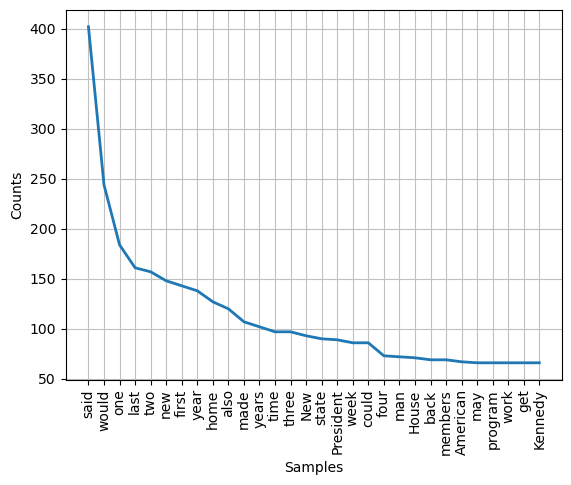

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
# Top 10 most common useful words
print(fdist.most_common(10))

# Plot for the top 30 useful words
fdist.plot(30, cumulative=False)


#### further removing common words

- `Extend the Stopword List`: Add these common words to your stopword list to filter them out.

- `Lemmatization`: Some words might appear in different forms (e.g., 'running', 'runs', 'ran' are all forms of the verb 'run'). By lemmatizing the text, you can reduce words to their base or root form.

- `Use Domain-Specific Stopwords`: Depending on the context of your analysis, you might want to remove domain-specific common words.

In [16]:
from nltk.stem import WordNetLemmatizer

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhupe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
# Extend the stopword list
extended_stopwords = set(stopwords.words('english')).union({'would', 
                                                            'could', 'made',
                                                            'said', 'say', 
                                                            'also', 'many', 
                                                            'one', 'two', 
                                                            'like', 'get', 
                                                            'make', 'way', 
                                                            'go'})

In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
# Lemmatize and filter words
filtered_words = [
    lemmatizer.lemmatize(word) 
    for word in brown.words(categories='news') 
    if word.lower() not in extended_stopwords and word.isalpha()
]

In [26]:
fdist = FreqDist(filtered_words)

[('year', 240), ('last', 161), ('new', 148), ('first', 143), ('home', 136), ('time', 115), ('state', 112), ('week', 111), ('member', 104), ('school', 102)]


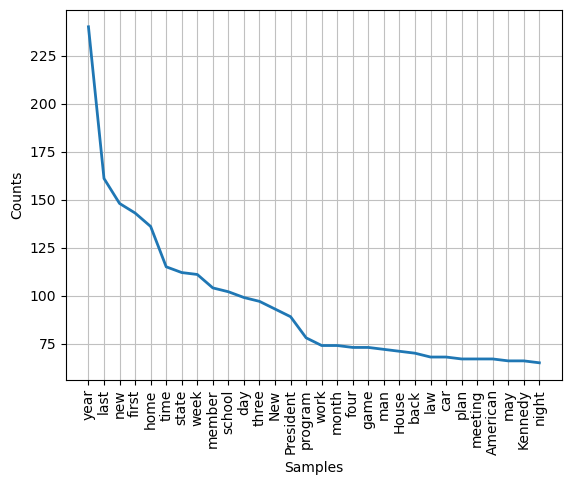

<Axes: xlabel='Samples', ylabel='Counts'>

In [27]:
# Display and plot
print(fdist.most_common(10))
fdist.plot(30, cumulative=False)